$$
(\delta, f, g) \mapsto\left\{\begin{array}{l}
(1-\delta, g,(g \ {\color{red}+} \ f) / 2), \text { if } \delta>0 \text { and } g \text { is odd } \\
(1+\delta, f,(g+(g \text { mod } 2) f) / 2), \text { otherwise. }
\end{array}\right.
$$

In [1]:
from random import randint

import random
import math
import statistics
import matplotlib.pyplot as plt
import csv

F = randint(0, 2**24)
G = randint(0, F - 1)
delta = 0.5
print(F)
print(G)

4436959
4398295


In [2]:
def Newdivstep(delta, f, g):
    g_and_1 = g & 1
    cond = (int(delta > 0)) & (g_and_1 == 1)

    if cond:
        delta = 1 - delta
        f_new = g 
        g_new = (g + f) >> 1
    else:
        delta = 1 + delta
        f_new = f
        g_new = (g + (g_and_1 * f)) >> 1
    return delta, f_new, g_new


def divstep(delta, f, g):
    g_and_1 = g & 1
    cond = (int(delta > 0)) & (g_and_1 == 1)

    if cond:
        delta = 1 - delta
        f_new = g 
        g_new = (g - f) >> 1
    else:
        delta = 1 + delta
        f_new = f
        g_new = (g + (g_and_1 * f)) >> 1
    return delta, f_new, g_new

MAX_STEPS = 200
def divstep_logger(f, g):
    conv_step = 0
    delta = 0.5
    for _ in range(MAX_STEPS):
        delta, f, g = divstep(delta, f, g)
        if f == 0 or g == 0:
            conv_step = _
            break
    return conv_step
            
def Newdivstep_logger(f, g):
    conv_step = 0
    delta = 0.5
    for _ in range(MAX_STEPS):
        delta, f, g = Newdivstep(delta, f, g)
        if (f - g) == 0:
            conv_step = _
            break
    return conv_step
            
  

實驗完成！所有試驗資料都已寫入 divstep_log.csv


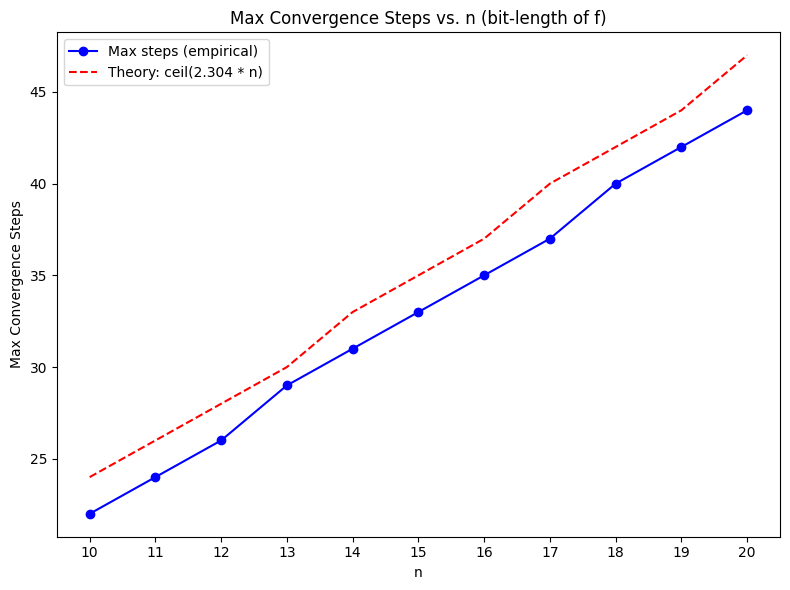

In [5]:
def experiment_divstep(n_min=1, n_max=20, trials=2000, log_filename='log.csv'):
    """
    針對 n_min <= n <= n_max:
      - 每個 n 做 trials 次實驗: 隨機 (f,g)
      - 用 divstep_logger 計算收斂步數
      - 寫入: n, conv_step, f, g 到 log_filename
    回傳一個 {n: max_step_for_n, ...} 字典，用於後續畫圖
    """
    results = {}
    
    with open(log_filename, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # 寫 CSV 表頭
        writer.writerow(["n", "conv_step", "f", "g"])

        for n in range(n_min, n_max + 1):
            max_step_for_n = 0

            # 計算 f 的範圍 [2^(n-1), 2^n)
            f_lower = 1 << (n-1)  # 2^(n-1)
            f_upper = 1 << n      # 2^n

            for _ in range(trials):
                # 產生隨機 f, g
                if n == 1:
                    f = 1  # n=1 => f 只能是 1
                else:
                    f = random.randint(f_lower, f_upper - 1)

                if f > 1:
                    g = random.randint(1, f - 1)
                else:
                    # f = 1 => g 幾乎只能是 0
                    g = 0

                # 記錄收斂步數
                conv_step = divstep_logger(f, g)
                if conv_step > max_step_for_n:
                    max_step_for_n = conv_step

                # 每次試驗都寫入CSV: n, conv_step, f, g
                writer.writerow([n, conv_step, f, g])

            # 最終把每個 n 的 "最高收斂步數" 留在 results
            results[n] = max_step_for_n

    return results

# --------------------------------
# 3) 視覺化: n vs. max_step
# --------------------------------
def plot_results(n_min, n_max, results_dict):
    """
    以 matplotlib 繪製:
      - x軸: n
      - y軸: 該 n 下的 max_step
      - 同時疊加理論線: y = 4.651 * n
    """
    xs = sorted(results_dict.keys())
    ys = [results_dict[n] for n in xs]

    # 先畫實驗觀測到的 max steps
    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, 'b-o', label='Max steps (empirical)')

    # 理論線 y = 4.651 * n
    theory_ys = [math.ceil(2.304 * x) for x in xs]
    plt.plot(xs, theory_ys, 'r--', label='Theory: ceil(2.304 * n)')

    plt.title(f"Max Convergence Steps vs. n (bit-length of f)")
    plt.xlabel("n")
    plt.ylabel("Max Convergence Steps")
    
    # 讓 x 軸的刻度只顯示整數
    plt.xticks(range(n_min, n_max+1))

    plt.legend()
    plt.tight_layout()
    plt.show()

# --------------------------------
# 4) 主程式
# --------------------------------

# 參數設定
N_MIN = 10
N_MAX = 20
TRIALS = 500000   # 每個 n 執行 500 次隨機測試(示範用，你可以改大/改小)
LOG_FILE = "divstep_log.csv"

# 做實驗 => 產生 log.csv
results_dict = experiment_divstep(N_MIN, N_MAX, TRIALS, LOG_FILE)
print(f"實驗完成！所有試驗資料都已寫入 {LOG_FILE}")

# 繪圖
plot_results(N_MIN, N_MAX, results_dict)

實驗完成！所有試驗資料都已寫入 Newdivstep_log.csv


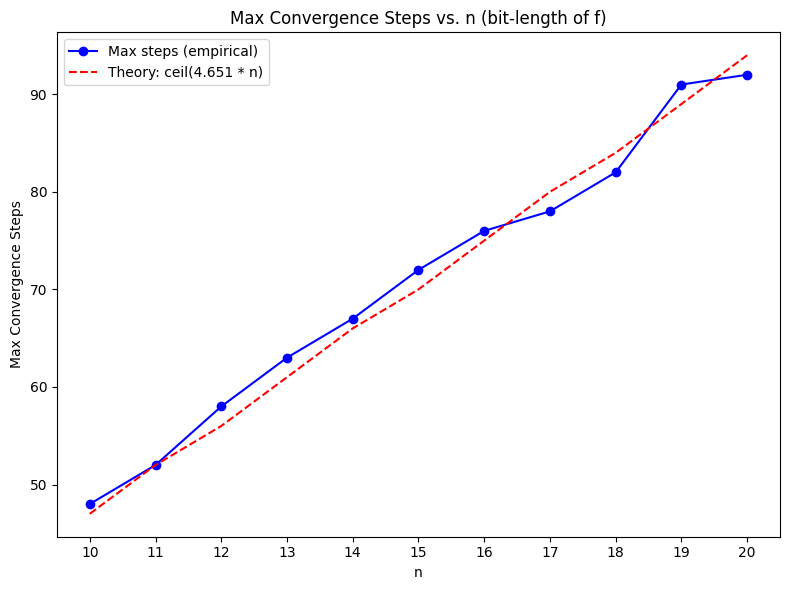

In [4]:
def experiment_Newdivstep(n_min=1, n_max=20, trials=2000, log_filename='log.csv'):
    """
    針對 n_min <= n <= n_max:
      - 每個 n 做 trials 次實驗: 隨機 (f,g)
      - 用 Newdivstep_logger 計算收斂步數
      - 寫入: n, conv_step, f, g 到 log_filename
    回傳一個 {n: max_step_for_n, ...} 字典，用於後續畫圖
    """
    results = {}
    
    with open(log_filename, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # 寫 CSV 表頭
        writer.writerow(["n", "conv_step", "f", "g"])

        for n in range(n_min, n_max + 1):
            max_step_for_n = 0

            # 計算 f 的範圍 [2^(n-1), 2^n)
            f_lower = 1 << (n-1)  # 2^(n-1)
            f_upper = 1 << n      # 2^n

            for _ in range(trials):
                # 產生隨機 f, g
                if n == 1:
                    f = 1  # n=1 => f 只能是 1
                else:
                    f = random.randint(f_lower, f_upper - 1)

                if f > 1:
                    g = random.randint(1, f - 1)
                else:
                    # f = 1 => g 幾乎只能是 0
                    g = 0

                # 記錄收斂步數
                conv_step = Newdivstep_logger(f, g)
                if conv_step > max_step_for_n:
                    max_step_for_n = conv_step

                # 每次試驗都寫入CSV: n, conv_step, f, g
                writer.writerow([n, conv_step, f, g])

            # 最終把每個 n 的 "最高收斂步數" 留在 results
            results[n] = max_step_for_n

    return results

# --------------------------------
# 3) 視覺化: n vs. max_step
# --------------------------------
def plot_results(n_min, n_max, results_dict):
    """
    以 matplotlib 繪製:
      - x軸: n
      - y軸: 該 n 下的 max_step
      - 同時疊加理論線: y = 4.651 * n
    """
    xs = sorted(results_dict.keys())
    ys = [results_dict[n] for n in xs]

    # 先畫實驗觀測到的 max steps
    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, 'b-o', label='Max steps (empirical)')

    # 理論線 y = 4.651 * n
    theory_ys = [math.ceil(4.651 * x) for x in xs]
    plt.plot(xs, theory_ys, 'r--', label='Theory: ceil(4.651 * n)')

    plt.title(f"Max Convergence Steps vs. n (bit-length of f)")
    plt.xlabel("n")
    plt.ylabel("Max Convergence Steps")
    
    # 讓 x 軸的刻度只顯示整數
    plt.xticks(range(n_min, n_max+1))

    plt.legend()
    plt.tight_layout()
    plt.show()

# --------------------------------
# 4) 主程式
# --------------------------------

# 參數設定
N_MIN = 10
N_MAX = 20
TRIALS = 500000   # 每個 n 執行 500 次隨機測試(示範用，你可以改大/改小)
LOG_FILE = "Newdivstep_log.csv"

# 做實驗 => 產生 log.csv
results_dict = experiment_Newdivstep(N_MIN, N_MAX, TRIALS, LOG_FILE)
print(f"實驗完成！所有試驗資料都已寫入 {LOG_FILE}")

# 繪圖
plot_results(N_MIN, N_MAX, results_dict)

In [6]:
import csv
import math

LOG_FILENAME = "Newdivstep_log.csv"

def check_exceed_theory(log_filename=LOG_FILENAME, factor=4.651):
    """
    讀取 log 檔 (CSV)，檢查哪些記錄的收斂步數 超過 ceil( factor * n )。
    回傳這些記錄的清單
    """
    exceed_records = []
    with open(log_filename, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        # 假設表頭: n, conv_step, f, g
        for row in reader:
            # 從字串轉回數字型態
            n = int(row["n"])
            conv_step = int(row["conv_step"])
            f_val = int(row["f"])
            g_val = int(row["g"])

            theory_bound = math.ceil(factor * n)
            if conv_step > theory_bound:
                # 收集該筆資料
                exceed_records.append({
                    "n": n,
                    "conv_step": conv_step,
                    "f": f_val,
                    "g": g_val,
                    "theory_bound": theory_bound
                })
    return exceed_records


records = check_exceed_theory(LOG_FILENAME, factor=4.651)
if not records:
    print("沒有任何資料超過理論預測！")
else:
    print("以下資料超過理論預測(ceil(4.651 * n))：")
    for rec in records:
        print(f"n={rec['n']} | conv_step={rec['conv_step']} | f={rec['f']} | g={rec['g']} | theory={rec['theory_bound']}")


以下資料超過理論預測(ceil(4.651 * n))：
n=10 | conv_step=48 | f=1014 | g=490 | theory=47
n=12 | conv_step=58 | f=3483 | g=2299 | theory=56
n=12 | conv_step=57 | f=3582 | g=3149 | theory=56
n=13 | conv_step=63 | f=8156 | g=5659 | theory=61
n=13 | conv_step=62 | f=7994 | g=5158 | theory=61
n=14 | conv_step=67 | f=14255 | g=12279 | theory=66
n=15 | conv_step=72 | f=30861 | g=25997 | theory=70
n=16 | conv_step=76 | f=43107 | g=42427 | theory=75
n=19 | conv_step=91 | f=372201 | g=96289 | theory=89
